# Lab 4

In [22]:
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import  image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image
import os


In [23]:
def plot_network_outputs(history):
    # Extract history data
    history_dict = history.history

    # Extract loss and accuracy
    loss = history_dict['loss']
    val_loss = history_dict.get('val_loss')  # Use .get() in case it's not present
    accuracy = history_dict.get('accuracy')  # Some models use 'acc' instead of 'accuracy'
    val_accuracy = history_dict.get('val_accuracy')  # Use .get() to avoid errors

    epochs = range(1, len(loss) + 1)  # Number of epochs

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    if val_loss:
        plt.semilogy(epochs, val_loss, 'r--', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy (if available)
    if accuracy:
        plt.subplot(1, 2, 2)
        plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
        if val_accuracy:
            plt.semilogy(epochs, val_accuracy, 'r--', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.show()

In [27]:
train_datagen = image.ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = image.ImageDataGenerator()

In [28]:
model = models.Sequential()
model.add(layers.Rescaling(scale=1./255, input_shape = (150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)      

Found 1992 images belonging to 2 classes.
Found 999 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 9s 89ms/step - loss: 0.7437 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5005
Epoch 2/100
100/100 [==============================] - 9s 88ms/step - loss: 0.6946 - accuracy: 0.5030 - val_loss: 0.6927 - val_accuracy: 0.5465
Epoch 3/100
100/100 [==============================] - 9s 89ms/step - loss: 0.6937 - accuracy: 0.5156 - val_loss: 0.6846 - val_accuracy: 0.5295
Epoch 4/100
100/100 [==============================] - 9s 90ms/step - loss: 0.6901 - accuracy: 0.5472 - val_loss: 0.7297 - val_accuracy: 0.5005
Epoch 5/100
100/100 [==============================] - 9s 92ms/step - loss: 0.6839 - accuracy: 0.5793 - val_loss: 0.6592 - val_accuracy: 0.5786
Epoch 6/100
100/100 [==============================] - 9s 92ms/step - loss: 0.6656 - accuracy: 0.6009 - val_loss: 0.6321 - val_accuracy: 0.6396
Epoch 7/100
100/100 [==============================] 

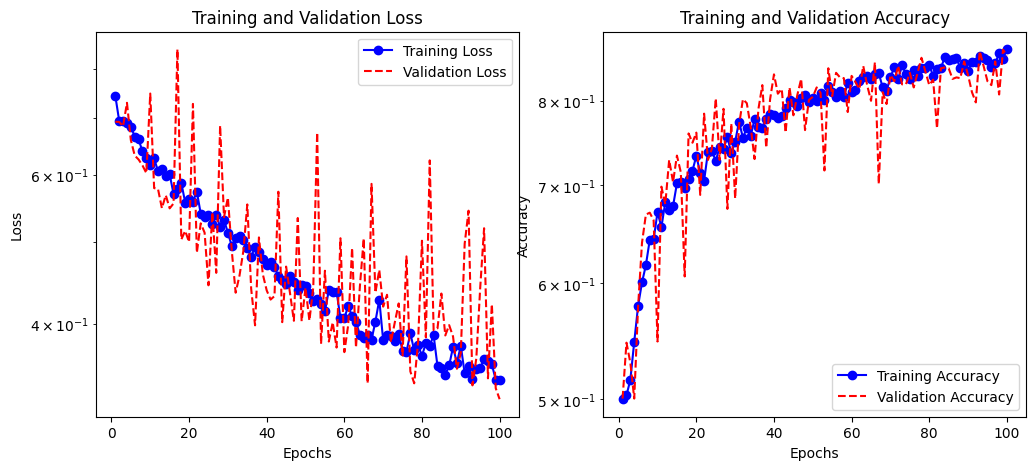

In [29]:
train_dir = "/home/karolina/Documents/ML-ISS/lab3/dataset/train"
validation_dir = "/home/karolina/Documents/ML-ISS/lab3/dataset/validation"


train_generator = train_datagen.flow_from_directory(
        # Set target directory:
        train_dir,
        # Resize images to 150x150 pixels:
        target_size=(150, 150),
        # Experiment with different batches:
        batch_size=20,
        # Labels needed for binary_crossentropy loss:
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
 
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

plot_network_outputs(history)